<a href="https://colab.research.google.com/github/alegarbed/DeepLearning/blob/master/2_Construir_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA Notebook | Building a Neural Network Step by Step

In [0]:
# Cargamos las librerías

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [0]:
# Creamos el dataset

n = 500 # número de neuronas
p = 2   # número de características

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

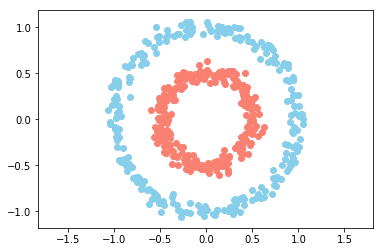

In [3]:
# Visualización del dataset

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [0]:
# Clase de la capa de la red

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1